### BUSNESS PROBLEM.
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
### NEED TO DO.
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. 
  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Basic Library is imported.

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FlipRobo/proj1/Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


1. Load dataset from Google Drive(As save the Data set)
2. Display Top 5 Row.
3. Found Columns 'Unamed' which one is same as index columns and 'pcircle' columns have same value troughoutnand 'msisdn' columns have unique identifications Numbers. Same need to Drop coluns which could not impect the result.

In [3]:
df=df.drop(['pcircle','Unnamed: 0','msisdn'],axis=1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7/20/2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8/10/2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8/19/2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6/6/2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6/22/2016


Droped 'Unamed' , 'msisdn' and 'pcircle' columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

As per aboveb there is no any missing value is in dataset and shape is Row: 209593 Columns: 34. All row have Dtype is int64 or float64 except pdate have object Dtype.

In [5]:
# pdate is object datatype need to convert in to int.
df.pdate=pd.to_datetime(df['pdate'])
df['p_day']=df['pdate'].dt.day
df['p_month']=df['pdate'].dt.month
df['p_year']=df['pdate'].dt.year
df=df.drop(['pdate'],axis=1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,p_day,p_month,p_year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6,2016


As aboveb columns 'pdate' has been converted into 'p_day','p_mont', 'p_year' and self droped column from dataset.
Now all Columns Dtype have Int and float.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


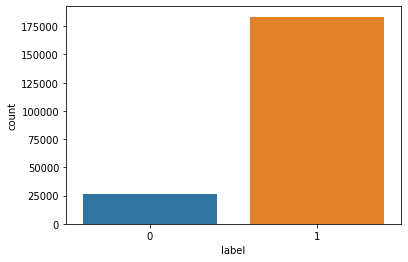

In [6]:
# need to check output level is balance or unbalenced using count plot.
sns.countplot(df['label'])

Output Level is highly imbalanced

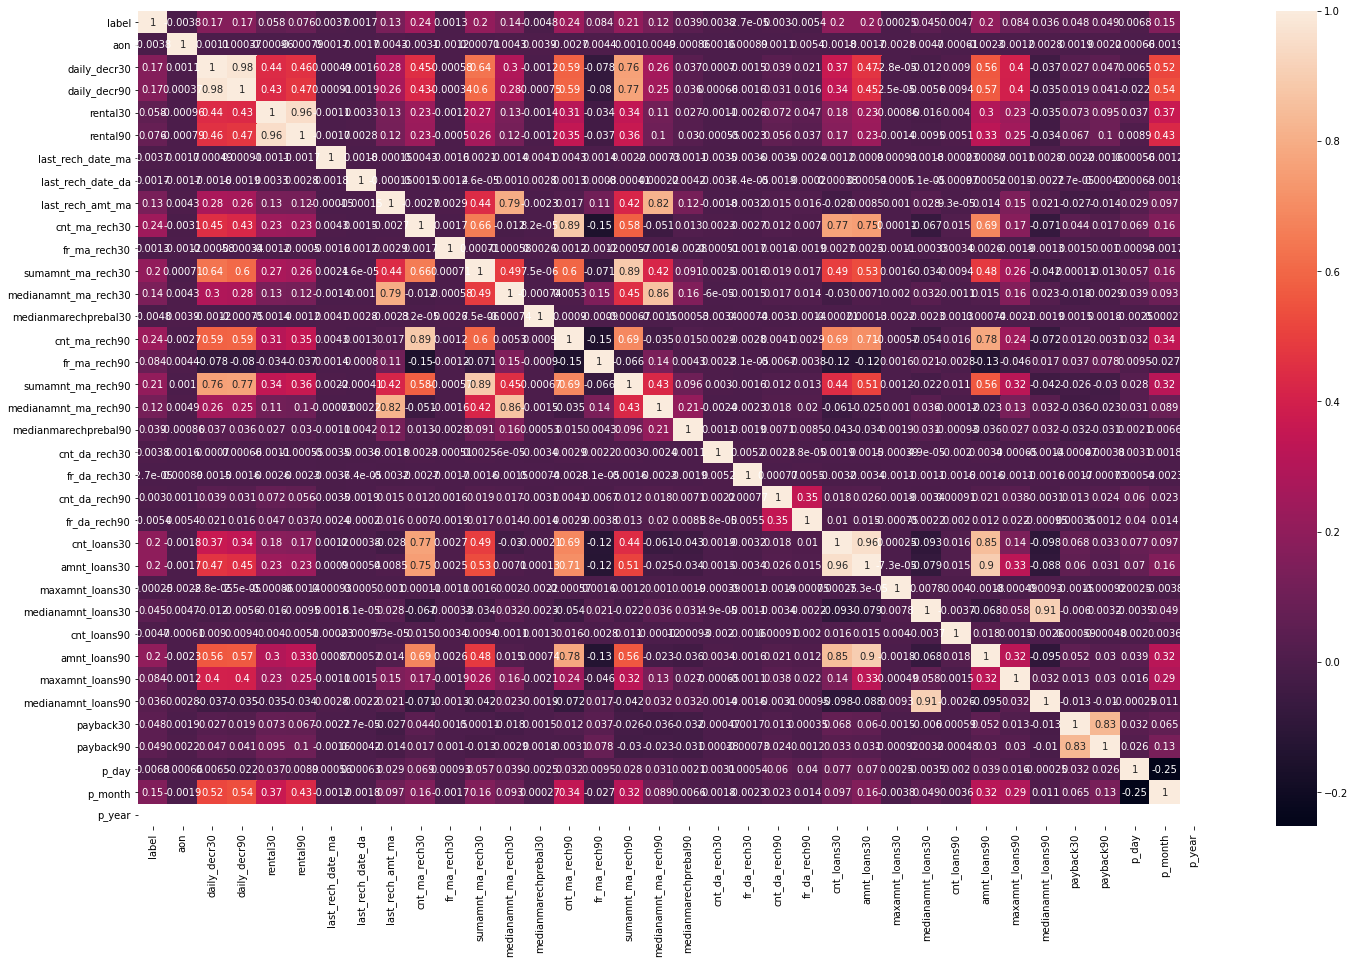

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,15))
sns.heatmap(df.corr(),annot=True)

we are unable to identify the corelletions in above heatmap due to large no of columns. Need to print the correlation values of independent variables with target variable in sort form.

In [10]:
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
p_month                 0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
p_day                   0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_lo

Now we can clearly identify the correlation of independent variable with target varaible 'label'. There are more than 2-25 columns have 0.01 correlation value (very week relationship).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


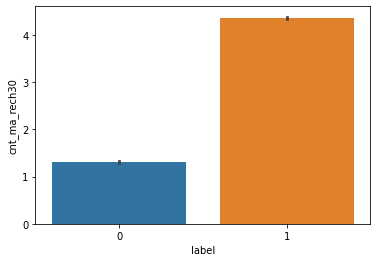

In [11]:
sns.barplot(df['label'],df['cnt_ma_rech30'])

Number of times main account got recharged in last 30 days is highly correlated with output level (High Number of times main account got recharged in last 30 days mostly paid loan)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


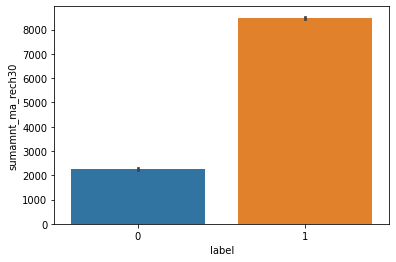

In [12]:
sns.barplot(df['label'],df['sumamnt_ma_rech30'])

Total amount of recharge in main account over last 30 days is highly correlated with output level (High Total amount of recharge in main account over last 30 days mostly paid loan)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


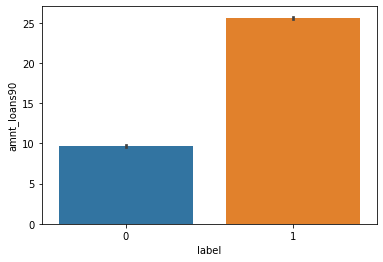

In [13]:
sns.barplot(df['label'],df['amnt_loans90'])

Number of loans taken by user in last 90 days is highly correlated with output level (High Number of loans taken by user in last 90 days mostly paid loan)

In [14]:
df_x=df.drop(['label'],axis=1)
y=df[['label']]
print(df_x.shape)
print(y.shape)

(209593, 35)
(209593, 1)


Seprated dependent and independent variables.

In [15]:
df_x.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

We can see skewness in the dataset , we will remove the skewness using power_transform functions.

In [16]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.cbrt(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.cbrt(df_x[index])

In [17]:
df_x.skew()

aon                      8.740118
daily_decr30             0.538116
daily_decr90             0.607607
rental30                 0.084165
rental90                 0.173289
last_rech_date_ma       13.755535
last_rech_date_da       14.001042
last_rech_amt_ma        -0.401954
cnt_ma_rech30           -1.894286
fr_ma_rech30            13.695845
sumamnt_ma_rech30       -0.213060
medianamnt_ma_rech30    -1.944025
medianmarechprebal30    11.578252
cnt_ma_rech90           -0.338958
fr_ma_rech90             0.362360
sumamnt_ma_rech90       -0.016530
medianamnt_ma_rech90    -2.348905
medianmarechprebal90     0.509085
cnt_da_rech30           14.792314
fr_da_rech30            14.127590
cnt_da_rech90            6.670255
fr_da_rech90            17.539627
cnt_loans30              0.269101
amnt_loans30             0.345374
maxamnt_loans30         14.597061
medianamnt_loans30       3.558178
cnt_loans90             10.411644
amnt_loans90             0.747726
maxamnt_loans90         -8.933486
medianamnt_loa

In [19]:
from imblearn.over_sampling import SMOTE
df_x, y = SMOTE().fit_resample(df_x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

Handling class imbalance by using oversampling.

In [20]:
#Lets do the preprocessing bring features to common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)

In [21]:
#since it is imbalanced dataset so we will focus on auc-roc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,60):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [22]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.921674116027948
auc roc score corresponding to  43  is  0.9228870563436411
auc roc score corresponding to  44  is  0.9215786772371575
auc roc score corresponding to  45  is  0.9210746172312766
auc roc score corresponding to  46  is  0.9207883989345942
auc roc score corresponding to  47  is  0.9232143583237308
auc roc score corresponding to  48  is  0.9217422132483165
auc roc score corresponding to  49  is  0.9212652407076625
auc roc score corresponding to  50  is  0.9227099119590733
auc roc score corresponding to  51  is  0.9214015009036909
auc roc score corresponding to  52  is  0.9208974212083724
auc roc score corresponding to  53  is  0.924100232561087
auc roc score corresponding to  54  is  0.9221240137343353
auc roc score corresponding to  55  is  0.922192179681986
auc roc score corresponding to  56  is  0.9240320837023821
auc roc score corresponding to  57  is  0.9240729756923965
auc roc score corresponding to  58  is  0.9214698555727442


53

In [23]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for decision tree classifier:  0.9182329970777833
standard deviation in roc auc score for decision tree classifier:  0.042318437389638884
[0.83210494 0.93836843 0.94052227 0.93938981 0.93862614]


In [24]:
#lets make our final model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 44,test_size=0.20,stratify=y)
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)

In [25]:
#Lets print auc roc score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[34084  2603]
 [ 3165 33521]]
f1 score is :  0.9207801126218926
classification report 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     36687
           1       0.93      0.91      0.92     36686

    accuracy                           0.92     73373
   macro avg       0.92      0.92      0.92     73373
weighted avg       0.92      0.92      0.92     73373

AUC ROC Score:  0.9213878720978469


In [26]:
import pickle
pickle.dump(dc, open ('model.pkl','wb'))

In [ ]:
#Lets use Gradient boosting classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=3,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

In [ ]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=3,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

In [ ]:
kc=KNeighborsClassifier(n_neighbors=29)
max_aucroc_score(kc,x,y)

In [ ]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for  KNN classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for KNN classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(kc,x,y,cv=5,scoring="roc_auc"))

In [ ]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

In [ ]:
svc=SVC(kernel="linear",C=0.1)
max_aucroc_score(svc,x,y)

In [ ]:
print("Mean roc auc score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc,x,y,cv=5,scoring="roc_auc"))

Only DC model could be execute and save rest of model unable to execute because execution time is very high.